# Imports

In [2]:
# imports
import pandas as pd
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing

# Methods

In [70]:
def normalize_col(col, doi, norm_val):
    data=(((doi[col]-doi[col].min())/(doi[col].max()-doi[col].min()))*norm_val)
    return data

# CDC Truth Data

In [3]:
new = pd.read_csv('NewCDCData/WHO_NREVSS_Clinical_Labs.csv')
old = pd.read_csv('NewCDCData/WHO_NREVSS_Combined_prior_to_2015_16.csv')
new=new.drop(columns=['REGION TYPE','REGION'])
old=old.drop(columns=['REGION TYPE','REGION'])
new['Total Cases'] = round(new['TOTAL SPECIMENS']*(new['PERCENT POSITIVE'])/100)
old['Total Cases'] = round(old['TOTAL SPECIMENS']*(old['PERCENT POSITIVE'])/100)
new=new.drop(columns=['PERCENT POSITIVE','PERCENT A','PERCENT B'])
# old=old.drop(columns=['PERCENT POSITIVE','PERCENT A','PERCENT B'])

In [4]:
old.head()

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,Total Cases
0,2003,40,1430,1.53846,0,0,2,19,0,1,0,22.0
1,2003,41,1682,4.57788,0,0,3,74,0,0,0,77.0
2,2003,42,2176,11.62680,0,0,17,235,0,1,0,253.0
3,2003,43,2568,17.83490,0,0,56,398,0,4,0,458.0
4,2003,44,2753,19.43330,0,0,100,435,0,0,0,535.0


In [5]:
new.head()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,Total Cases
0,2015,40,12029,84,43,127.0
1,2015,41,13111,116,54,170.0
2,2015,42,13441,97,52,149.0
3,2015,43,13537,98,52,150.0
4,2015,44,14687,97,68,165.0


In [6]:
new = new.drop(columns=['TOTAL A','TOTAL B','TOTAL SPECIMENS'])
new.head()

,YEAR,WEEK,Total Cases
0,2015,40,127.0
1,2015,41,170.0
2,2015,42,149.0
3,2015,43,150.0
4,2015,44,165.0


In [7]:
old = old.drop(columns=['TOTAL SPECIMENS','PERCENT POSITIVE','A (2009 H1N1)','A (H1)','A (H3)','A (Subtyping not Performed)','A (Unable to Subtype)','B','H3N2v'])

In [8]:
old

,YEAR,WEEK,Total Cases
0,2003,40,22.0
1,2003,41,77.0
2,2003,42,253.0
3,2003,43,458.0
4,2003,44,535.0
5,2003,45,862.0
6,2003,46,1291.0
7,2003,47,1968.0
8,2003,48,2251.0
9,2003,49,3269.0


In [9]:
new

,YEAR,WEEK,Total Cases
0,2015,40,127.0
1,2015,41,170.0
2,2015,42,149.0
3,2015,43,150.0
4,2015,44,165.0
5,2015,45,208.0
6,2015,46,182.0
7,2015,47,211.0
8,2015,48,226.0
9,2015,49,246.0


In [10]:
data=pd.concat([old,new])

In [19]:
oi = 0
for i in range(len(data)):
    data['weeks']=i
    oi = oi +1

In [23]:
data.shape

(853, 4)

In [30]:
data = data.reset_index()
data = data.reset_index()

In [53]:
data.head(20)
data = data.drop(columns=["level_0",'index'])
data=data[14:]
data =data.reset_index()
data.head()

,index,YEAR,WEEK,Total Cases,weeks
0,14,2004,1,862.0,14
1,15,2004,2,505.0,15
2,16,2004,3,260.0,16
3,17,2004,4,166.0,17
4,18,2004,5,107.0,18


In [55]:
data =data.reset_index()


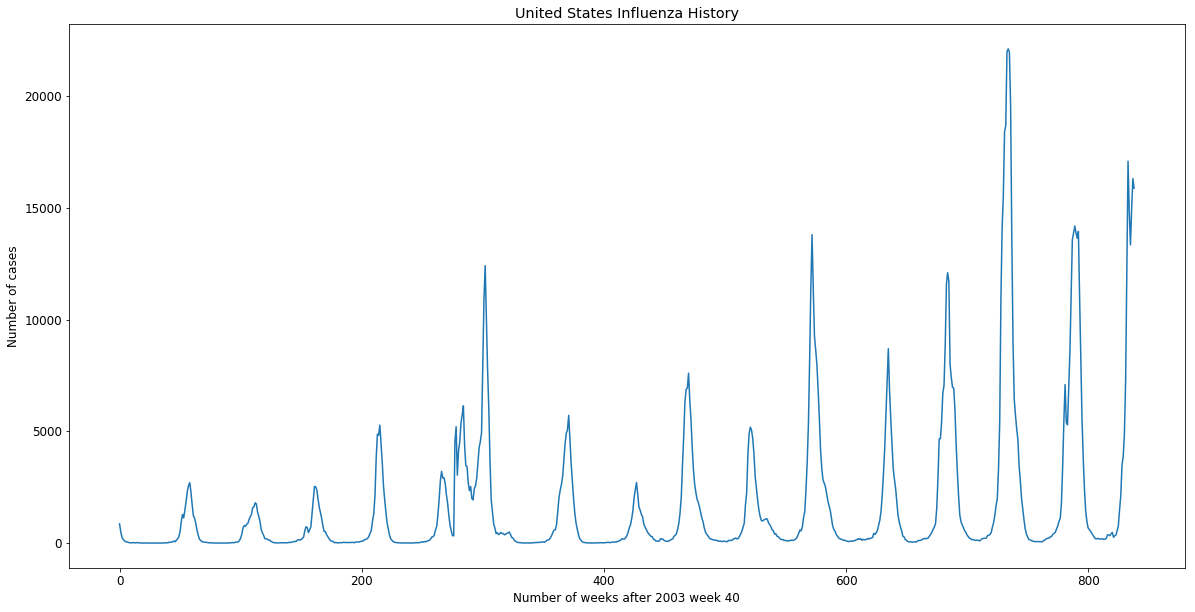

In [56]:
fig = plt.figure(figsize=(20,10))
y = data['Total Cases']
x = data['level_0']
plt.rcParams.update({'font.size': 12})
plt.title('United States Influenza History')
plt.xlabel('Number of weeks after 2003 week 40')
plt.ylabel('Number of cases')
plt.plot(x,y)

In [185]:
data

,level_0,index,YEAR,WEEK,Total Cases,weeks
0,0,14,2004,1,862.0,14
1,1,15,2004,2,505.0,15
2,2,16,2004,3,260.0,16
3,3,17,2004,4,166.0,17
4,4,18,2004,5,107.0,18
5,5,19,2004,6,65.0,19
6,6,20,2004,7,56.0,20
7,7,21,2004,8,38.0,21
8,8,22,2004,9,18.0,22
9,9,23,2004,10,14.0,23


# Common Cold

In [132]:
data = pd.DataFrame()
term19 = ['common_cold','cough','flu_symptoms','influenza','prevent_flu']
term20 = ['commoncold-dis','cough-st','flusymptoms-st','influenza-disease','preventflu-st']
og = ['Category: All categories','Cough: (United States)','flu symptoms: (United States)','Influenza: (United States)','prevent flu: (United States)']

for i in range(len(term19)):
    cc_old = pd.read_csv('terms/2019/'+term19[i]+'.csv')
    cc_new = pd.read_csv('terms/2020/'+term20[i]+'.csv')
    cc_new = cc_new.drop('Day', axis=0)
    newname = term19[i]
    cc_new = cc_new.rename(columns={'Category: All categories':newname})
    cc_new_weekly = pd.DataFrame()
    j = 0
    totl = 0
    for i in range(cc_new.shape[0]):
        if(j%7==0):
            cc_new_weekly = cc_new_weekly.append([totl])
            totl=0
        j = j+1
        totl = totl+int(cc_new[newname][i])
    cc_new_weekly = cc_new_weekly.rename(columns={0:newname})
    cc_new_weekly = cc_new_weekly.reset_index()
    cc_new_weekly = cc_new_weekly.drop(columns=['index'])
    cc_new_weekly = cc_new_weekly.drop([0])
    cc_new_weekly = normalize_col(newname,cc_new_weekly,100)
    cc_new_weekly = pd.DataFrame(cc_new_weekly)
    cc_new_weekly = cc_new_weekly.drop(1)
    cc_new_weekly = cc_new_weekly.reset_index()
    cc_new_weekly = cc_new_weekly.drop(columns=['index'])
    cc_old = cc_old.drop(columns=['Week','WEEK']).rename(columns={'Common cold: (United States)':newname})
    cc=pd.concat([cc_old,cc_new_weekly])
    cc=cc.reset_index().drop(columns=['index'])
    data = pd.concat([data,cc],axis=1)
    
data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,common_cold,Cough: (United States),cough,flu symptoms: (United States),flu_symptoms,Influenza: (United States),influenza,prevent flu: (United States),prevent_flu
0,76.000000,65.0,NaN,55.0,NaN,28.0,NaN,0,NaN
1,69.000000,56.0,NaN,39.0,NaN,19.0,NaN,0,NaN
2,63.000000,55.0,NaN,31.0,NaN,15.0,NaN,0,NaN
3,59.000000,49.0,NaN,28.0,NaN,16.0,NaN,33,NaN
4,50.000000,49.0,NaN,20.0,NaN,16.0,NaN,0,NaN
5,56.000000,50.0,NaN,26.0,NaN,15.0,NaN,100,NaN
6,45.000000,49.0,NaN,21.0,NaN,13.0,NaN,66,NaN
7,51.000000,50.0,NaN,17.0,NaN,14.0,NaN,31,NaN
8,43.000000,48.0,NaN,10.0,NaN,11.0,NaN,0,NaN
9,44.000000,41.0,NaN,11.0,NaN,9.0,NaN,0,NaN


In [126]:
data = pd.DataFrame()
term19 = ['common_cold','cough','flu_symptoms','influenza','prevent_flu']
term20 = ['commoncold-dis','cough-st','flusymptoms-st','influenza-disease','preventflu-st']

for i in range(len(term19)):
    cc_old = pd.read_csv('terms/2019/'+term19[i]+'.csv')
    cc_new = pd.read_csv('terms/2020/'+term20[i]+'.csv')
    cc_new = cc_new.drop('Day', axis=0)
    newname = term19[i]
    cc_new = cc_new.rename(columns={og[i]:newname})
    cc_new_weekly = pd.DataFrame()
    j = 0
    totl = 0
    for i in range(cc_new.shape[0]):
        if(j%7==0):
            cc_new_weekly = cc_new_weekly.append([totl])
            totl=0
        j = j+1
        totl = totl+int(cc_new[newname][i])
    cc_new_weekly = cc_new_weekly.rename(columns={0:newname})
    cc_new_weekly = cc_new_weekly.reset_index()
    cc_new_weekly = cc_new_weekly.drop(columns=['index'])
    cc_new_weekly = cc_new_weekly.drop([0])
    cc_new_weekly = normalize_col(newname,cc_new_weekly,100)
    cc_new_weekly = pd.DataFrame(cc_new_weekly)
    cc_new_weekly = cc_new_weekly.drop(1)
    cc_new_weekly = cc_new_weekly.reset_index()
    cc_new_weekly = cc_new_weekly.drop(columns=['index'])
    cc_old = cc_old.drop(columns=['Week','WEEK']).rename(columns={'Common cold: (United States)':newname})
    cc=pd.concat([cc_old,cc_new_weekly])
    cc=cc.reset_index().drop(columns=['index'])
    data = pd.concat([data,cc],axis=1)
    
data

KeyError: 'cough'

# Old CC

In [67]:
common_cold_dis = pd.read_csv('terms/2020/common-cold_dis.csv')
common_cold_dis = common_cold_dis.drop("Month",axis=0)
common_cold_dis = common_cold_dis.reset_index()
common_cold_dis

,index,Category: All categories
0,2004-01,25
1,2004-02,19
2,2004-03,16
3,2004-04,13
4,2004-05,13
5,2004-06,12
6,2004-07,11
7,2004-08,12
8,2004-09,15
9,2004-10,23


# DO NOT USE BELOW CODE

In [171]:
df = pd.read_csv('terms/2019/common_cold.csv')
mn = 7
d = 6
yr = 19
ccn = 186
cols = ['Week', 'Common cold: (United States)','WEEK']
for i in range(8):
    string = (str(mn)+'/'+str(d)+'/'+str(yr))
    df1 = pd.DataFrame([[string,common_cold_dis['Category: All categories'][ccn],0]],columns=cols)
    df = df.append(df1)
    d = d+7
    if mn==12 and d/30>1:
        mn = 1
        yr = yr +1
    if d/30>1:
        mn = mn+1
    if mn==7 or mn==8 or mn == 10 or mn ==12:
        d = d%31
    else:
        d=d%30
    ccn = ccn +1

In [172]:
df

,Week,Common cold: (United States),WEEK
0,1/4/04,76,1
1,1/11/04,69,2
2,1/18/04,63,3
3,1/25/04,59,4
4,2/1/04,50,5
5,2/8/04,56,6
6,2/15/04,45,7
7,2/22/04,51,8
8,2/29/04,43,9
9,3/7/04,44,10


In [173]:
df = df.reset_index()
df = df.drop(columns=['index',"WEEK"])

In [176]:
df = df.reset_index()
df

,index,Week,Common cold: (United States)
0,0,1/4/04,76
1,1,1/11/04,69
2,2,1/18/04,63
3,3,1/25/04,59
4,4,2/1/04,50
5,5,2/8/04,56
6,6,2/15/04,45
7,7,2/22/04,51
8,8,2/29/04,43
9,9,3/7/04,44


In [1]:
def normalize_col(col, doi, norm_val):
    data=((doi[col]-doi[col].min())/(doi[col].max()-doi[col].min()))*norm_val
    return data

In [190]:
data['Total Cases'] = normalize_col('Total Cases',data,100)

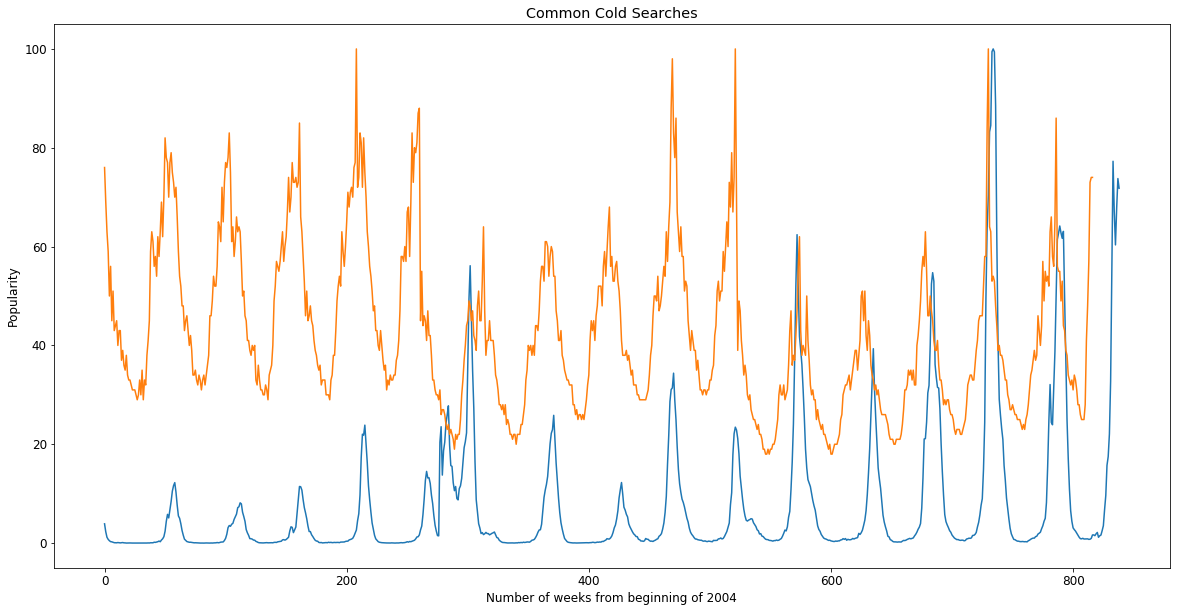

In [191]:
fig = plt.figure(figsize=(20,10))
y = df['Common cold: (United States)']
x = df['index']
y1 = data['Total Cases']
x1 = data['level_0']
plt.plot(x1,y1)
plt.rcParams.update({'font.size': 12})
plt.title('Common Cold Searches')
plt.xlabel('Number of weeks from beginning of 2004')
plt.ylabel('Popularity')
plt.plot(x,y)

# Making Dataset

In [304]:
data = pd.DataFrame()

# Influenza Search Term

In [305]:
newname = 'influenza st pop'
old = pd.read_csv('terms/2020/influenza-st-3-7-10to3-7-15.csv')
new = pd.read_csv('terms/2020/influenza-st-3-1-15toprez.csv')
old = old.drop('Week')
new = new.drop('Week')
old = old.rename(columns={'Category: All categories':newname})
new = new.rename(columns={'Category: All categories':newname})
new[newname] = pd.to_numeric(new[newname])
old[newname] = pd.to_numeric(old[newname])
new[newname] = normalize_col(newname,new,216) # normalizing it so that the last element in 
# old[newname] is the same as the first element in new[newname] 
# because both of these elements refer to the same week
new = pd.concat([old,new])

new = new.reset_index()
new = new.drop(260)
new = new.reset_index()
new = new.drop(columns=['level_0'])

#### ITERATION 2 OF CONCATENATION ####
old = pd.read_csv('terms/2020/influenza-st-3-13-05to3-13-10.csv')
old = old.drop('Week')
old = old.rename(columns={'Category: All categories':newname})
old[newname] = pd.to_numeric(old[newname])
old = old.reset_index()
new[newname] = normalize_col(newname,new,41.14780) # normalizing it so that the last element in 
# old[newname] is the same as the first element in new[newname] 
# because both of these elements refer to the same week
new = pd.concat([old,new])
new = new.reset_index()
new = new.drop(columns=['level_0'])
new = new.drop(260)
new = new.reset_index()
new = new.drop(columns=['level_0'])

In [306]:
data = pd.concat([data,new])

# Influenza Disease

In [307]:
newname = 'influenza dis pop'
name = 'influenza-dis-'
old = pd.read_csv('terms/2020/'+name+'3-7-10to3-7-15.csv')
new = pd.read_csv('terms/2020/'+name+'3-1-15toprez.csv')
old = old.drop('Week')
new = new.drop('Week')
old = old.rename(columns={'Category: All categories':newname})
new = new.rename(columns={'Category: All categories':newname})
new[newname] = pd.to_numeric(new[newname])
old[newname] = pd.to_numeric(old[newname])
new[newname] = normalize_col(newname,new,157.625) # normalizing it so that the last element in 
# old[newname] is the same as the first element in new[newname] 
# because both of these elements refer to the same week
new = pd.concat([old,new])
new = new.reset_index()
new = new.drop(260)
new = new.reset_index()
new = new.drop(columns=['level_0'])

#### ITERATION 2 OF CONCATENATION ####
old = pd.read_csv('terms/2020/'+name+'3-13-05to3-13-10.csv')
old = old.drop('Week')
old = old.rename(columns={'Category: All categories':newname})
old[newname] = pd.to_numeric(old[newname])
old = old.reset_index()
new[newname] = normalize_col(newname,new,112.58929) # normalizing it so that the last element in 
# old[newname] is the same as the first element in new[newname] 
# because both of these elements refer to the same week
new = pd.concat([old,new])
new = new.reset_index()
new = new.drop(columns=['level_0'])
new = new.drop(260)
new = new.reset_index()
new = new.drop(columns=['level_0'])
new = new.rename(columns={'index':'todrop'})
data = pd.concat([data,new],axis=1)
data = data.drop(columns=['todrop'])

# Common Cold Disease